Case Study 3.1
In this case study, you will perform essential data preprocessing steps on the Penguins dataset. The dataset contains information about different species of penguins, including their physical characteristics and the region where they were observed. Your goal is to prepare the dataset for machine learning analysis. Follow these steps:

1. Load the penguins dataset using the code snippet provided below.
Perform initial data exploration to understand the dataset's structure, features, and any missing values. Summarize the dataset's statistics and gain insights into the data.

2. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.

3. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection technques.

4. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.

5. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.

6. Scale or normalize the numerical features to ensure consistent scaling across variables.

7. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.

8. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data (before feature filtering, transformation, and reduction) to ensure that preprocessing has improved model performance.

In [ ]:
# Import the 'load_dataset' function from seaborn to load the penguins dataset
from seaborn import load_dataset
import seaborn as sns
import pandas as pd


# Load the penguins dataset and store it in the 'df' DataFrame
df = load_dataset('penguins')

df.head()
df.info()
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584  

#Descriptive statistics


In [ ]:
Mean = df.mean()
print(f"Mean values: {Mean.values}\n")

# Calculate the median for each column in the DataFrame
Median = df.median()
print(f"Median values: {Median.values}\n")

# Calculate the mode for each column in the DataFrame
Mode = df.mode().values
print(f"Mode values: {Mode}\n")

Mean values: [  43.92192982   17.15116959  200.91520468 4201.75438596]

Median values: [  44.45   17.3   197.   4050.  ]

Mode values: [['Adelie' 'Biscoe' 41.1 17.0 190.0 3800.0 'Male']]



<ipython-input-50-edbcacfe3d49>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mean = df.mean()
<ipython-input-50-edbcacfe3d49>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Median = df.median()


#Normal Distribution


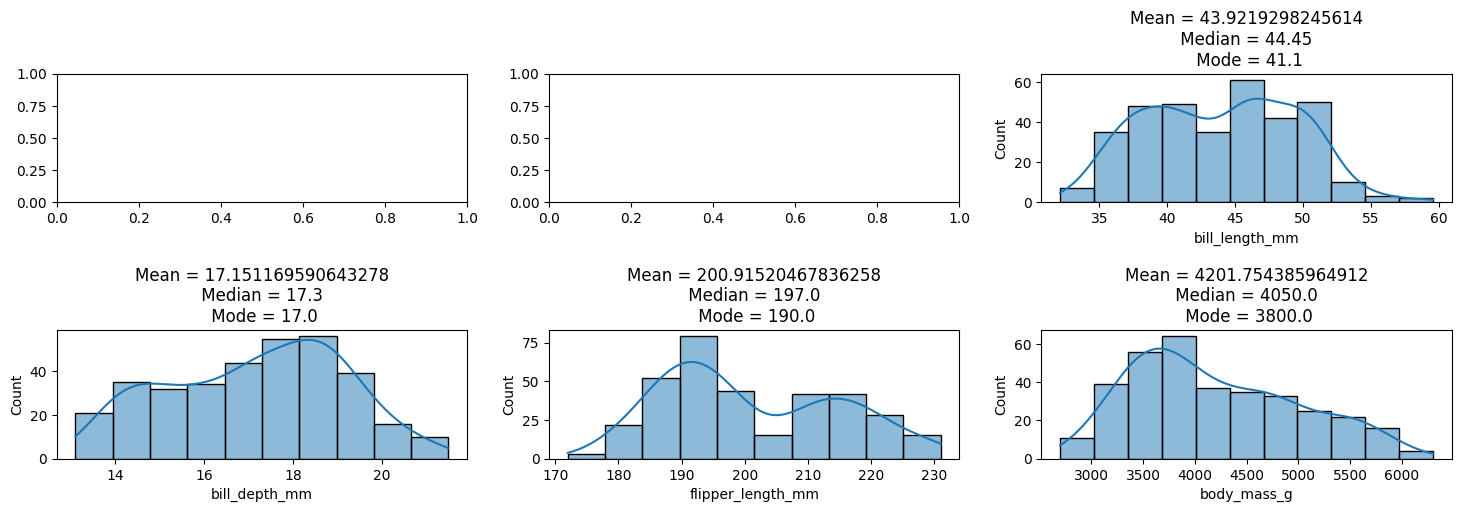

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=3,nrows=2)

sns.histplot(data=df, x="bill_length_mm", ax=axs[0,2], kde=True);
axs[0,2].set_title(f"Mean = {Mean[0]}\n Median = {Median[0]} \n Mode = {Mode[0,2]}")

sns.histplot(data=df, x="bill_depth_mm", ax=axs[1,0], kde=True);
axs[1,0].set_title(f"Mean = {Mean[1]}\n Median = {Median[1]} \n Mode = {Mode[0,3]}")

sns.histplot(data=df, x="flipper_length_mm", ax=axs[1,1], kde=True);
axs[1,1].set_title(f"Mean = {Mean[2]}\n Median = {Median[2]} \n Mode = {Mode[0,4]}")

sns.histplot(data=df, x="body_mass_g", ax=axs[1,2], kde=True);
axs[1,2].set_title(f"Mean = {Mean[3]}\n Median = {Median[3]} \n Mode = {Mode[0,5]}")

fig.subplots_adjust(hspace=1)

In [ ]:
df = load_dataset('penguins')

print("\nThe rows with missing values:")
df[df.isnull().all(axis=1)]


The rows with missing values:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


there is no entire rows with a missing value.


# 2. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.

##Imputation using KNN

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
impute = KNNImputer()
dfCopy = df.copy()
for i in df.select_dtypes(include='object').columns:
    dfCopy[i][dfCopy[i].notnull()] = encode.fit_transform(df[i])


df.head()

<ipython-input-53-cf1c4816f13e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[i][dfCopy[i].notnull()] = encode.fit_transform(df[i])
<ipython-input-53-cf1c4816f13e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[i][dfCopy[i].notnull()] = encode.fit_transform(df[i])
<ipython-input-53-cf1c4816f13e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[i][dfCopy[i].notnull()] = encode.fit_transform(df[i])


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


scale the values to impute

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sca = MinMaxScaler()
df_sca = pd.DataFrame(sca.fit_transform(dfCopy),columns=df.columns)
df_sca.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,0.0,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,0.167273,0.738095,0.355932,0.208333,0.0


Impute using KNNImputer

In [ ]:
#imputation

new_df = pd.DataFrame(impute.fit_transform(df_sca), columns=dfCopy.columns)
new_df.isnull().sum()


new_df['sex'] = new_df['sex'].round()
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    float64
 1   island             344 non-null    float64
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    float64
dtypes: float64(7)
memory usage: 18.9 KB


In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


{'whiskers': [<matplotlib.lines.Line2D at 0x7a819e558910>,
 'caps': [<matplotlib.lines.Line2D at 0x7a81a1f2e9e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a819e558df0>,
 'medians': [<matplotlib.lines.Line2D at 0x7a819e405570>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a819e406ad0>,
 'means': []}

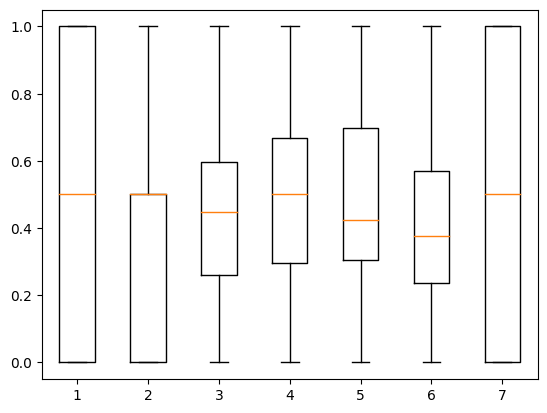

In [ ]:
plt.boxplot(new_df)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

dt = pd.DataFrame(sca.inverse_transform(new_df),columns=df.columns)

dt['sex'] = dt['sex'].map({0:'Female', 1:'Male'})

dt['species'] = dt['species'].map({0:'Adeile',1:'Chinstrap',2:'Gentoo'})

dt['island'] = dt['island'].map({0:'Biscoe',1:'Dream',2:'Torgersen'})

dt.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adeile,Torgersen,39.10,18.70,181.0,3750.0,Male
1,Adeile,Torgersen,39.50,17.40,186.0,3800.0,Female
2,Adeile,Torgersen,40.30,18.00,195.0,3250.0,Female
3,Adeile,Torgersen,39.32,17.54,191.4,3740.0,Male
4,Adeile,Torgersen,36.70,19.30,193.0,3450.0,Female


#3. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection technques.

bill_length_mm: 0.4005943199463772
bill_depth_mm: 0.1733610897537185
flipper_length_mm: 0.33687261560663834
body_mass_g: 0.08917197469326593


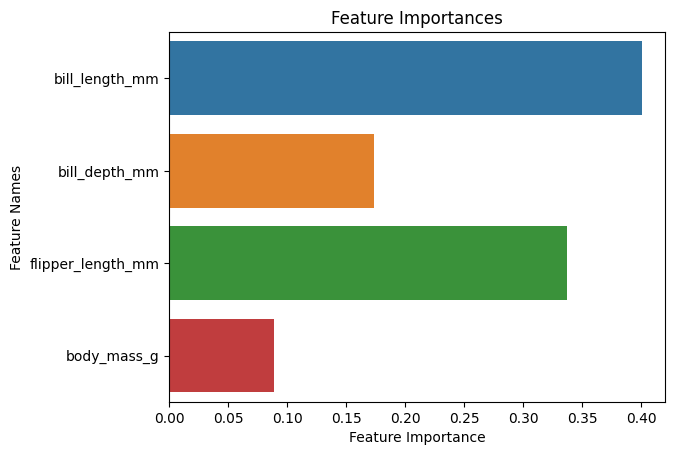

In [ ]:
X = dt[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = dt['species']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# get feature importances from rfc
feature_importances = rfc.feature_importances_

# show the feature importance
for i, column in enumerate(X.columns):
    print(f'{column}: {feature_importances[i]}')

sns.barplot(x=feature_importances, y=X.columns)
plt.ylabel('Feature Names')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


# 4, 5, and 6

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# feature with categorical values are species, sex, and island
dt['species_encoded'] = le.fit_transform(dt['species'])
dt['sex_encoded'] = le.fit_transform(dt['sex'])
dt['island_encoded'] = le.fit_transform(dt['island'])

dt.drop(['species', 'sex', 'island'], axis=1, inplace=True)

from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = MinMaxScaler()
dt[features_to_scale] = scaler.fit_transform(dt[features_to_scale])

dt.head()

X = dt.drop(['species_encoded'], axis=1)
y = dt['species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
dt.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_encoded,sex_encoded,island_encoded
0,0.254545,0.666667,0.152542,0.291667,0,1,2
1,0.269091,0.511905,0.237288,0.305556,0,0,2
2,0.298182,0.583333,0.389831,0.152778,0,0,2
3,0.262545,0.528571,0.328814,0.288889,0,1,2
4,0.167273,0.738095,0.355932,0.208333,0,0,2


#7, and 8

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')

accuracy: 0.9855072463768116


In [ ]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_pca, y_train)
y_pred = rfc.predict(X_test_pca)

# calculate the accuracy score
accuracy_after = accuracy_score(y_test, y_pred)

print(f"Explained variance ratio for each PCA component: {pca.explained_variance_ratio_}")
print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features retained after PCA: {X_train_pca.shape[1]}")
print(f'accuracy before PCA: {accuracy}')
print(f'accuracy after PCA: {accuracy_after}')

Explained variance ratio for each PCA component: [0.60084402 0.28721888 0.07350732 0.02249837]
Number of original features: 6
Number of features retained after PCA: 4
accuracy before PCA: 0.9855072463768116
accuracy after PCA: 0.9710144927536232
